# Reading 

In [1]:
#import required libraries
import pandas as pd
import os
os.chdir('D:\DA\Technolab Intern\Task 1 Mini Project')

In [2]:
#reading files
miles_drivenby_state = pd.read_csv('miles-driven.csv', sep = '|')
miles_drivenby_state.head()

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [3]:
#reading file 2
#skipping 9 rows from the raw file
road_accident = pd.read_csv('road-accidents.csv', sep = '|', comment ="#")
road_accident.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [4]:
road_accident_new = road_accident.join(miles_drivenby_state['million_miles_annually'])
road_accident_new.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually
0,Alabama,18.8,39,30,80,64914
1,Alaska,18.1,41,25,94,4593
2,Arizona,18.6,35,28,96,59575
3,Arkansas,22.4,18,26,95,32953
4,California,12.0,35,28,89,320784


#  Multivariate linear regression

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
scaler = StandardScaler()
reg = LinearRegression()

In [6]:
features = road_accident[['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time']]
taget_var = road_accident[['drvr_fatl_col_bmiles']]

In [7]:
reg.fit(features, taget_var)
reg_cof = reg.coef_
print(reg_cof)

[[-0.04180041  0.19086404  0.02473301]]


# PCA

In [8]:
scaled_df = scaler.fit_transform(features)

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [10]:
pca.fit(scaled_df)

PCA(n_components=2)

In [11]:
pca_component = pca.transform(scaled_df)

In [12]:
scaled_df.shape

(51, 3)

In [13]:
pca_component.shape

(51, 2)

In [14]:
pca_component

array([[ 0.88463912,  0.46421102],
       [-0.62529903, -1.22024698],
       [-0.67169596, -1.02786253],
       [-1.83954608,  0.23991011],
       [-0.21174283, -0.25666671],
       [-0.49390467, -1.05414432],
       [ 1.98805561, -0.22697834],
       [-0.41984695, -1.56080846],
       [-1.13099129, -1.40144229],
       [-1.18444358,  0.14877025],
       [-1.79251216,  0.39090271],
       [ 2.80996806, -1.31802924],
       [-0.60664618, -1.31530775],
       [ 0.2268846 , -1.08935235],
       [-1.02598376, -0.23430583],
       [-1.51035032,  1.18838032],
       [-0.95893975,  0.72533611],
       [-0.95632936,  2.26156134],
       [-0.10099555, -1.24259045],
       [ 0.56576691,  0.091754  ],
       [-0.36316811, -1.28565771],
       [ 0.6900851 ,  1.56144575],
       [-0.03971211,  1.81587269],
       [-0.67811433,  0.67334261],
       [-1.63409399, -0.10065137],
       [ 1.40766864, -0.24488656],
       [ 2.52202483, -0.07092466],
       [-0.52740931,  1.14200056],
       [-0.19504256,

In [15]:
pca_component_1 = pca_component[:,0]
pca_component_2 = pca_component[:,1]

In [16]:
import matplotlib.pyplot as plt

# Visualize the first two principal components

Text(0, 0.5, 'Second principle component')

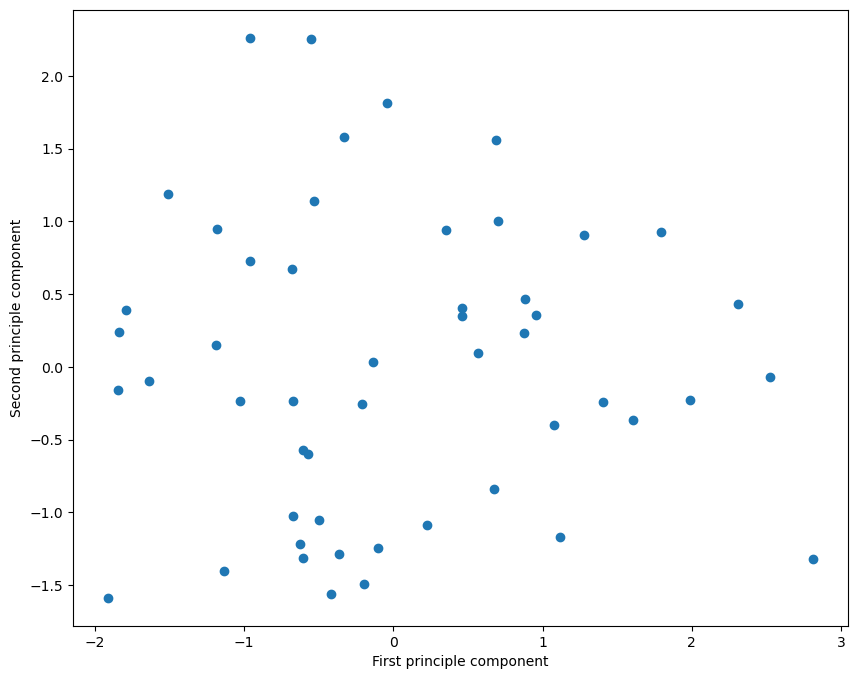

In [17]:
plt.figure(figsize=(10,8))
plt.scatter(pca_component_1, pca_component_2)
#plt.scatter(pca_component[:,0], pca_component[:,1], c= road_accident['drvr_fatl_col_bmiles'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

### Find clusters of similar states in the data Elbow method

C:\Users\sinur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


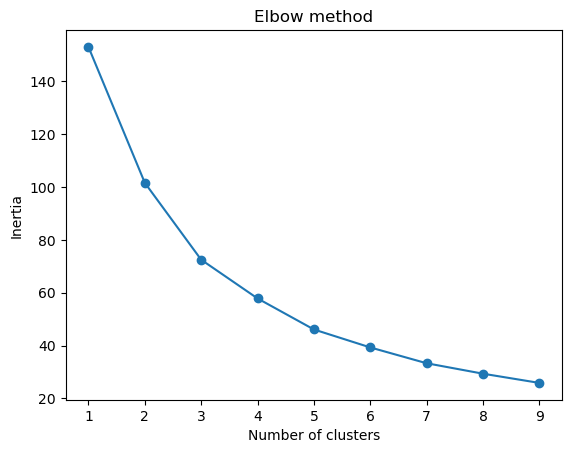

In [18]:
from sklearn.cluster import KMeans

inertias = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,10), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# KMeans to visualize clusters in the PCA scatter plot

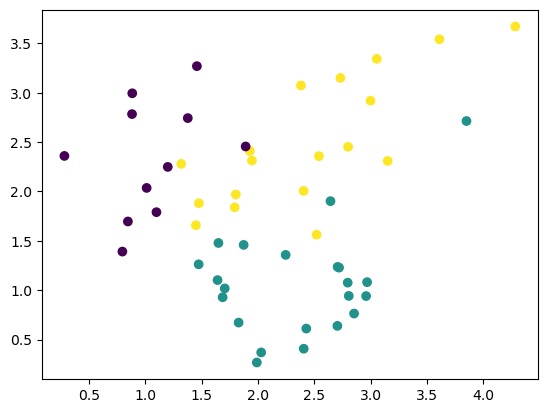

In [19]:
#for 3 features taken KMeans n_cluster 3
kmeans = KMeans(n_clusters=3)
kmean_df = kmeans.fit_transform(scaled_df)
plt.scatter(kmean_df[:,0], kmean_df[:,1], c=kmeans.labels_)
plt.show()

In [20]:
import seaborn as sns
#kmeans = KMeans(n_clusters=3)
#kmean_df = kmeans.fit_transform(scaled_df)
#sns.scatterplot(kmean_df[:,0], kmean_df[:,1], c=kmeans.labels_)
#plt.show()

# Visualize unscaled features to see the differences

In [21]:
features.head(3)

,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,39,30,80
1,41,25,94
2,35,28,96


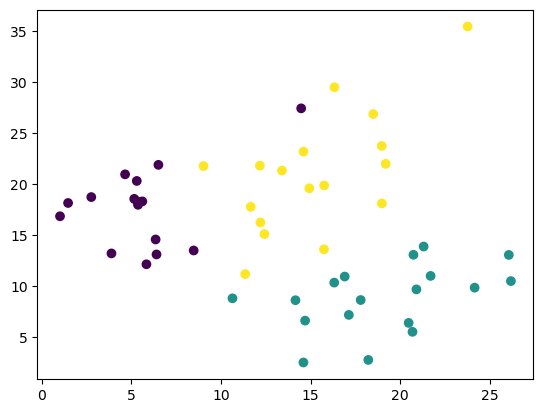

In [22]:
kmeans = KMeans(n_clusters=3)
kmean_df = kmeans.fit_transform(features)
plt.scatter(kmean_df[:,0], kmean_df[:,1], c=kmeans.labels_)
plt.show()

# Number of accident per thousand mile

In [31]:
acc_thousand_mile = miles_drivenby_state['million_miles_annually']*road_accident['drvr_fatl_col_bmiles']/1000
each_state_acc = pd.DataFrame(acc_thousand_mile)
#each_state_acc['each_state_acc'] = each_state_acc
each_state_acc.columns = ['each_state_acc']
each_state_acc.head(3)

,each_state_acc
0,1220.3832
1,83.1333
2,1108.0950


<AxesSubplot:xlabel='each_state_acc'>

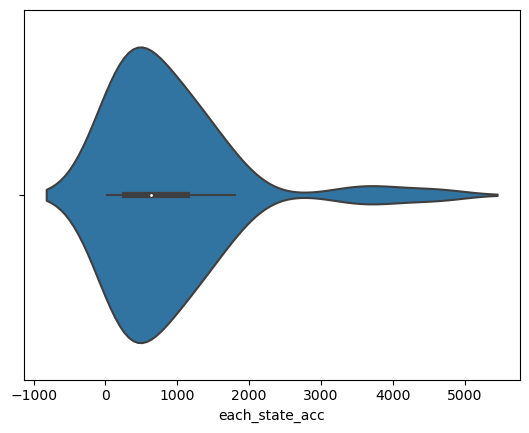

In [38]:
sns.violinplot(x=each_state_acc["each_state_acc"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x203aa84afd0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x203aa84af40>,
 'cmins': <matplotlib.collections.LineCollection at 0x203aa85a6d0>,
 'cbars': <matplotlib.collections.LineCollection at 0x203aa85aa90>}

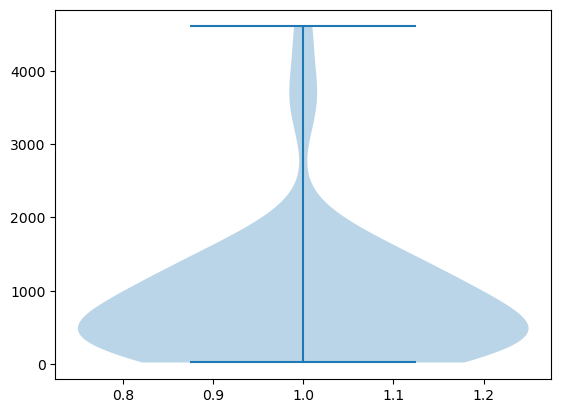

In [47]:
plt.violinplot(each_state_acc)

In [34]:
#miles_drivenby_state.head(3)

In [35]:
#road_accident.head(3)